In [1]:
import pandas as pd
import numpy as np
import zipfile
import io

In [ ]:
def merge_csv_from_zip(zip_file_path):
  """
  Merges all CSV files within a ZIP archive into a single DataFrame.

  Args:
    zip_file_path: Path to the ZIP file containing the CSV files.

  Returns:
    A pandas DataFrame containing the merged data.
  """

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    dfs = []
    for file_info in zip_ref.infolist():
      if file_info.filename.endswith('.csv'):
        with zip_ref.open(file_info) as csv_file:
          df = pd.read_csv(csv_file) 
          dfs.append(df)

  merged_df = pd.concat(dfs, ignore_index=True)
  return merged_df

zip_file_path = 'csv_files.zip' 

merged_df = merge_csv_from_zip(zip_file_path)

merged_df.to_csv('merged_data.csv', index=False)

print("All CSV files merged successfully!")

In [ ]:
#here we encounter the utf-8 issues and we are able to solve this problem

df=pd.read_csv("merged_data.csv")
df.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,location,ÿþ,property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type
0,ff8080814780f30801478d14132f03f4,BHK3,23-03-2017 16:13,2.0,2.0,2.0,SEMI_FURNISHED,1,12.936557,77.558291,...,8.0,1200.0,1,560050.0,17500.0,200000.0,IF,NaN,NaN,NaN
1,ff8081814bd62607014bd8aaa8a201e9,BHK1,06-03-2017 18:35,1.0,0.0,2.0,SEMI_FURNISHED,0,12.928694,77.543154,...,6.0,600.0,0,560085.0,8000.0,750000.0,AP,NaN,NaN,NaN
2,ff8081814bedb29e014bee1fad8000e0,BHK2,28-03-2017 12:10,2.0,2.0,2.0,SEMI_FURNISHED,0,12.926532,77.551174,...,1.0,1000.0,0,560085.0,12000.0,100000.0,IF,NaN,NaN,NaN
3,ff8081814c17ede2014c1baa66fe0546,BHK2,20-02-2017 17:35,2.0,0.0,5.0,SEMI_FURNISHED,0,12.922729,77.544885,...,5.0,1250.0,0,560085.0,15000.0,150000.0,AP,NaN,NaN,NaN
4,ff8081814c2dea94014c3c3581a92106,BHK2,13-03-2017 12:34,3.0,2.0,2.0,SEMI_FURNISHED,0,12.928058,77.545904,...,10.0,1200.0,0,560085.0,12500.0,125000.0,IF,NaN,NaN,NaN


In [ ]:
#the columns are messy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14532 entries, 0 to 14531
Data columns (total 24 columns):
 #   Column                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                       --------------  -----  
 0   property_id                                                                                                                                                                                                  13435 non-null  object 
 1   type                                                                                                                                                                                    

In [ ]:
# we drop the some unwanted columns that got created inthe merging process
df.drop(columns=['ÿþ','location', 'property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type'
],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14532 entries, 0 to 14531
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      13435 non-null  object 
 1   type             13435 non-null  object 
 2   activation_date  13435 non-null  object 
 3   bathroom         13435 non-null  float64
 4   floor            13435 non-null  float64
 5   total_floor      13416 non-null  float64
 6   furnishing       13435 non-null  object 
 7   gym              13435 non-null  object 
 8   latitude         13435 non-null  float64
 9   longitude        13435 non-null  float64
 10  lease_type       13435 non-null  object 
 11  lift             13435 non-null  object 
 12  locality         13211 non-null  object 
 13  parking          13435 non-null  object 
 14  property_age     13435 non-null  float64
 15  property_size    13435 non-null  float64
 16  swimming_pool    13435 non-null  object 
 17  pin_code    

In [23]:
# checking for the null valuse
df.isna().sum()

property_id        1097
type               1097
activation_date    1097
bathroom           1097
floor              1097
total_floor        1116
furnishing         1097
gym                1097
latitude           1097
longitude          1097
lease_type         1097
lift               1097
locality           1321
parking            1097
property_age       1097
property_size      1097
swimming_pool      1097
pin_code           1219
rent               1097
deposit            1097
building_type      1135
dtype: int64

In [ ]:
# we droped the duplicate values
df=df.drop_duplicates()

In [ ]:
# er droped the null values
df.dropna(inplace=True)

In [38]:
# read the property_photo.tsv file and created a photo count column

photos_df = pd.read_csv('property_photos.tsv', sep='\t') 

photo_counts = photos_df.groupby('property_id')['photo_urls'].count().reset_index(name='photo_count')

merged_df = df.merge(photo_counts, on='property_id', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13083 entries, 0 to 13082
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      13083 non-null  object 
 1   type             13083 non-null  object 
 2   activation_date  13083 non-null  object 
 3   bathroom         13083 non-null  float64
 4   floor            13083 non-null  float64
 5   total_floor      13083 non-null  float64
 6   furnishing       13083 non-null  object 
 7   gym              13083 non-null  object 
 8   latitude         13083 non-null  float64
 9   longitude        13083 non-null  float64
 10  lease_type       13083 non-null  object 
 11  lift             13083 non-null  object 
 12  locality         13083 non-null  object 
 13  parking          13083 non-null  object 
 14  property_age     13083 non-null  float64
 15  property_size    13083 non-null  float64
 16  swimming_pool    13083 non-null  object 
 17  pin_code    

In [ ]:

interactions_df = pd.read_csv('property_interactions.csv') 

total_interactions_df = interactions_df.groupby('property_id')['request_date'].count().reset_index(name='total_interactions')

merged_df = merged_df.merge(total_interactions_df, on='property_id', how='left')

In [56]:
# used to calculate the no of intractions
sum=merged_df['total_interactions_x'].sum()
sum

79181.0

In [57]:
df=merged_df.drop(columns=['total_interactions_x','total_interactions_y'],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13083 entries, 0 to 13082
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      13083 non-null  object 
 1   type             13083 non-null  object 
 2   activation_date  13083 non-null  object 
 3   bathroom         13083 non-null  float64
 4   floor            13083 non-null  float64
 5   total_floor      13083 non-null  float64
 6   furnishing       13083 non-null  object 
 7   gym              13083 non-null  object 
 8   latitude         13083 non-null  float64
 9   longitude        13083 non-null  float64
 10  lease_type       13083 non-null  object 
 11  lift             13083 non-null  object 
 12  locality         13083 non-null  object 
 13  parking          13083 non-null  object 
 14  property_age     13083 non-null  float64
 15  property_size    13083 non-null  float64
 16  swimming_pool    13083 non-null  object 
 17  pin_code    

In [59]:
num_att=[att for att in df.columns if df[att].dtype!="O"]
cat_att=[att for att in df.columns if df[att].dtype=="O"]
num_att,"="*30,cat_att

(['bathroom',
  'floor',
  'total_floor',
  'latitude',
  'longitude',
  'property_age',
  'property_size',
  'pin_code',
  'rent',
  'deposit',
  'photo_count'],
 '==============================',
 ['property_id',
  'type',
  'activation_date',
  'furnishing',
  'gym',
  'lease_type',
  'lift',
  'locality',
  'parking',
  'swimming_pool',
  'building_type'])

## EDA ##

In [61]:
df.describe(include='O').T

,count,unique,top,freq
property_id,13083,13083,ff8080814780f30801478d14132f03f4,1
type,13083,6,BHK2,6557
activation_date,13083,10165,02-03-2017 19:23,16
furnishing,13083,3,SEMI_FURNISHED,10386
gym,13083,4,0,10359
lease_type,13083,4,FAMILY,6710
lift,13083,4,0,8719
locality,13083,61,Whitefield,740
parking,13083,4,BOTH,6520
swimming_pool,13083,4,0,10712


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroom,13083.0,1.832837,0.775298,0.0,1.000000,2.000000,2.000000,2.100000e+01
floor,13083.0,1.842620,2.481686,0.0,0.000000,1.000000,2.000000,1.230000e+02
total_floor,13083.0,3.624933,3.358339,0.0,2.000000,3.000000,4.000000,3.800000e+01
latitude,13083.0,12.951237,0.177975,0.0,12.906922,12.946662,12.998299,1.741814e+01
longitude,13083.0,77.609809,0.962549,0.0,77.563990,77.612729,77.677940,8.025629e+01
property_age,13083.0,4.363296,6.418960,0.0,0.000000,3.000000,6.000000,4.570000e+02
property_size,13083.0,991.890621,676.996493,0.0,600.000000,950.000000,1230.000000,4.000000e+04
pin_code,13083.0,561070.551632,76903.647657,0.0,560043.000000,560066.000000,560078.000000,5.600035e+06
rent,13083.0,14593.929450,8617.084682,1000.0,8500.000000,13000.000000,18000.000000,7.500000e+04
deposit,13083.0,122628.809524,121453.352909,0.0,50000.000000,100000.000000,150000.000000,3.000000e+06


In [74]:
count=df.groupby("rent")['locality'].sum()
count

rent
1000.0                                              JP Nagar
1023.0                                             Yelahanka
1102.0                                           Hongasandra
1500.0                                             Gottigere
1600.0                                          Sunkadakatte
                                 ...                        
65000.0    BrookefieldJP NagarJP NagarDoddanekundiBelland...
68000.0                                           Whitefield
69000.0                                        BTM 2nd Stage
70000.0    BrookefieldJP NagarJP NagarHebbalBellandurBile...
75000.0    Basaveshwar NagarHulimavuKadugodiBellandurMaha...
Name: locality, Length: 334, dtype: object

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

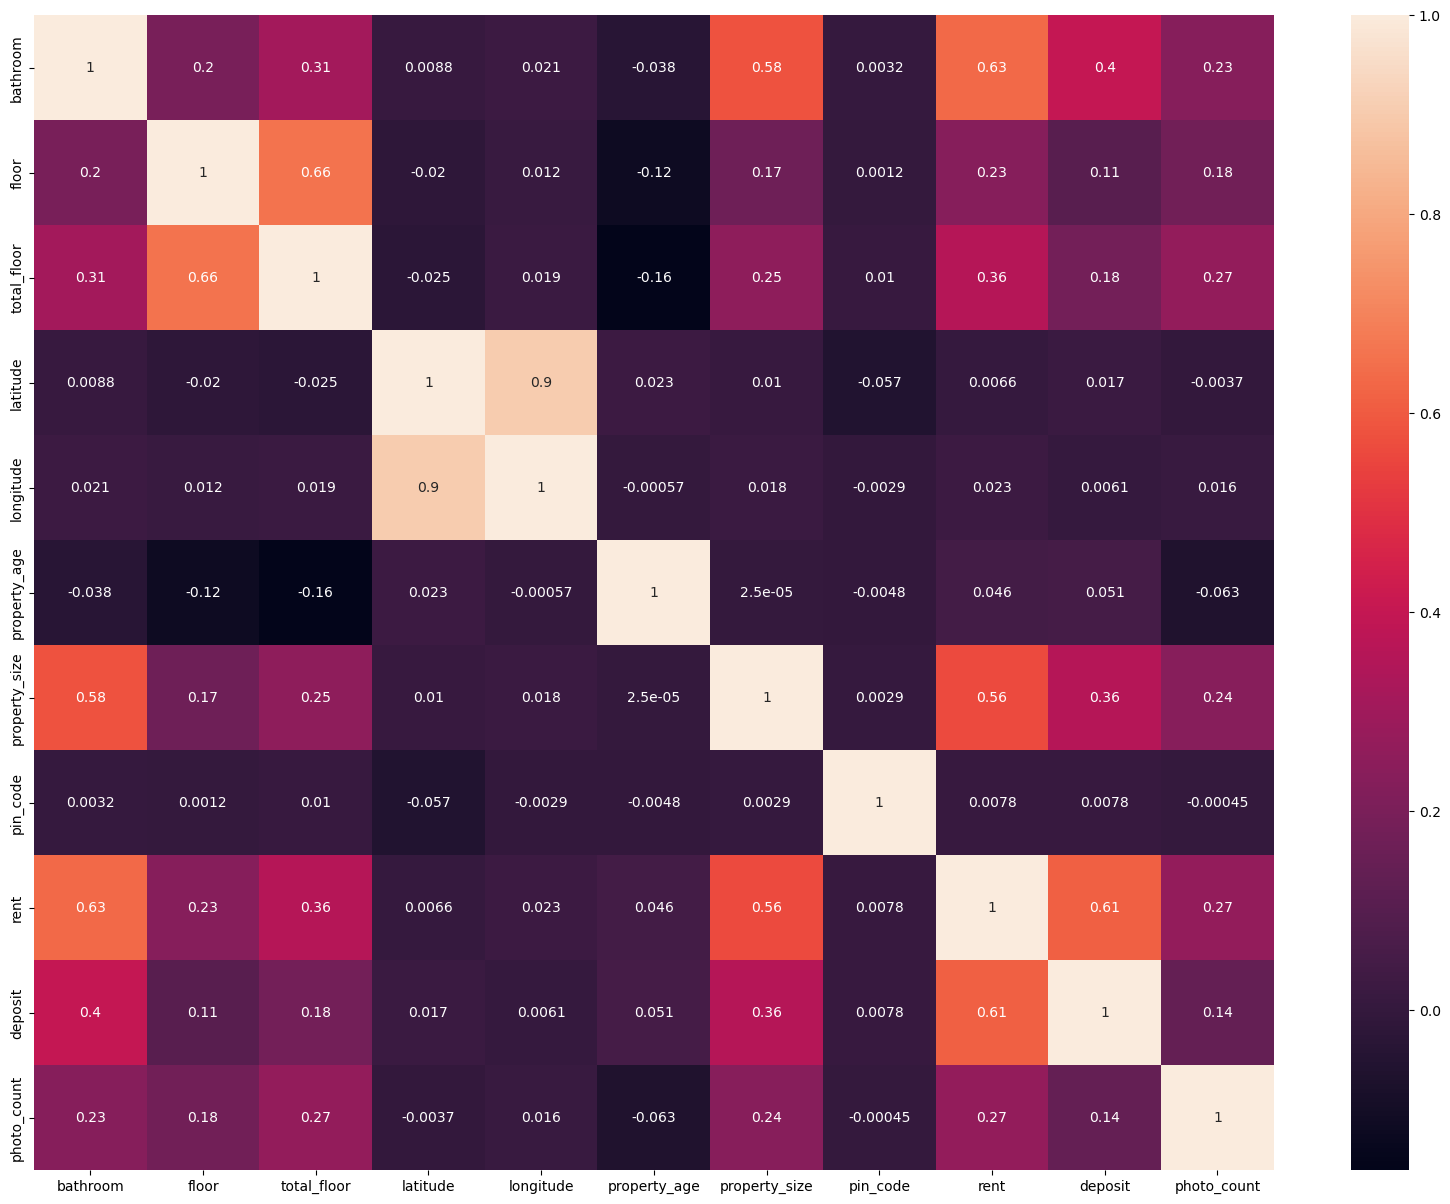

In [79]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [80]:
def categorize_property_age(age):
    if age <= 0:
        return "New"
    elif 0 < age <= 5:
        return "Less than 5 years"
    elif 5 < age <= 10:
        return "5 to 10 years"
    elif 10 < age <= 20:
        return "10 to 20 years"
    else:
        return "More than 20 years"
df['property_age_category'] = df['property_age'].apply(categorize_property_age)
most_frequent_category = df['property_age_category'].value_counts().idxmax()
print(f"The most frequent property age category is: {most_frequent_category}")

The most frequent property age category is: Less than 5 years
